In [6]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import gridspec

## Метод опорных векторов в sklearn

**Задание 1.** Отобразите на графике данные задач `task1` и `task2`. Каждому классу определите свой цвет. Какое ядро необходимо выбрать для данных задач?

In [9]:
data1 = pd.read_csv(r'data/task1.csv')
data2 = pd.read_csv(r'data/task2.csv')

In [10]:
data1.head(3)

,0.05783332750103509,-1.3980957764264415,-1
0,0.236386,0.283487,-1
1,-0.819391,0.809699,1
2,1.491693,-1.704607,-1


In [11]:
data2.head(3)

,9.349912500599189,-0.17304368756928667,1
0,-9.489691,-3.736932,1
1,-0.773686,-0.334750,-1
2,7.537869,3.060028,1


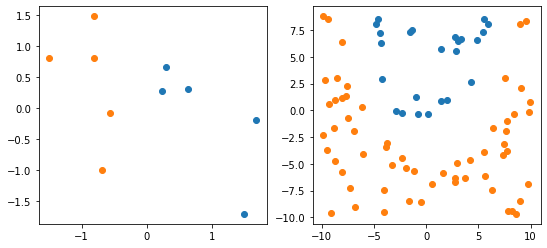

In [21]:
data = [data1.values, data2.values]

fig, gs = plt.figure(figsize=(9, 4)), gridspec.GridSpec(1, 2)
ax = []
for i in range(2):
    ax.append(fig.add_subplot(gs[i]))
    X, Y = data[i][:, :-1], data[i][:, -1]
    for k in np.unique(Y):
        ax[-1].scatter(X[:, 0][Y==k], X[:, 1][Y==k])
plt.show()

Для первой выборки данных можно использовать линейное ядро, так как данные линейно разделимы.  
  
Для второй линейное ядро использовать не получится, так как данные линейно не разделимы, необходимо применять нелинейные ядра.

**Задание 2.** Обучите SVM из sklearn (`sklearn.svm.SVC`) с выбранными функциями ядра. Какие объекты оказались опорными? (методы `support_` и `support_vectors_` после применения метода `fit`)

In [22]:
from sklearn.svm import SVC

In [23]:
m1, m2 = SVC(kernel='linear'), SVC()

In [25]:
X0, y0 = data[0][:, :-1], data[0][:, -1]
X1, y1 = data[1][:, :-1], data[1][:, -1]

In [26]:
m1.fit(X0, y0)
m2.fit(X1, y1)

SVC()

Опорные объекты:

In [27]:
m1.support_

array([0, 5, 3, 4, 6])

In [28]:
m2.support_

array([ 1, 11, 19, 27, 32, 35, 46, 53, 67, 71, 73,  2,  5,  9, 12, 15, 30,
       37, 39, 52, 55, 80, 83])

Опорные векторы:

In [30]:
m1.support_vectors_

array([[ 0.23638569,  0.28348681],
       [ 0.29379903,  0.66023859],
       [-0.56784047, -0.07100018],
       [-0.69441368, -0.99227863],
       [-0.81316409,  1.4809596 ]])

In [31]:
m2.support_vectors_

array([[-0.77368594, -0.33474987],
       [-4.23488395,  2.89957896],
       [ 0.21069158, -0.29980541],
       [-2.91017433, -0.02225634],
       [-4.62313433,  8.57062626],
       [-2.3384616 , -0.24062757],
       [ 5.90735266,  8.04857575],
       [ 4.31556286,  2.69393642],
       [ 5.50914184,  8.5247225 ],
       [-4.79086668,  8.06866448],
       [ 5.48771328,  7.29468577],
       [ 7.53786946,  3.06002849],
       [-6.13653268,  0.28747428],
       [ 9.52254432,  8.34221068],
       [ 2.92318866, -4.95989192],
       [-3.74120757, -3.07462674],
       [-9.41172453,  8.53605063],
       [-3.86307988, -3.44686084],
       [ 6.37020475, -1.67675974],
       [-8.05105707,  6.38394517],
       [-2.30563574, -4.43450167],
       [-7.55149136,  2.27918859],
       [ 8.93859605,  8.09652503]])

**Задание 3.** Отобразите на графике полученную разделяющую гиперплоскость (методы `coef_` и `intercept_` после применения `fit`).

(для нелинейного будем строить в задании 4)

In [42]:
def plot_hyperplane(clf, min_x, max_x, linestyle, label, ax):
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(min_x, max_x)
    yy = a * xx - (clf.intercept_[0]) / w[1]
    ax.plot(xx, yy, linestyle, label=label)

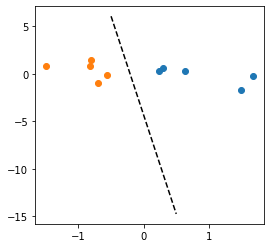

In [45]:
fig, gs = plt.figure(figsize=(9, 4)), gridspec.GridSpec(1, 2)
models = [m1, m2]
labels = ['linear', 'not linear']
x_minmax = [[-0.5, 0.5], [-10, 10]]
ax = []
for i in range(1):
    ax.append(fig.add_subplot(gs[i]))
    X, Y = data[i][:, :-1], data[i][:, -1]
    for k in np.unique(Y):
        ax[-1].scatter(X[:, 0][Y==k], X[:, 1][Y==k])
    plot_hyperplane(models[i], x_minmax[i][0], x_minmax[i][1],
                    'k--', labels[i], ax[i])
plt.show()

**Задание 4.** В задаче `task2` проведите сравнение на графике различных функций ядра. (`kernel`: 'linear', 'poly', 'rbf', 'sigmoid', для полиномиального ядра 'poly' рассмотрите различные степени полинома `degree`).

In [46]:
from mlxtend.plotting import plot_decision_regions

Рассмотрим модели с различными ядрами

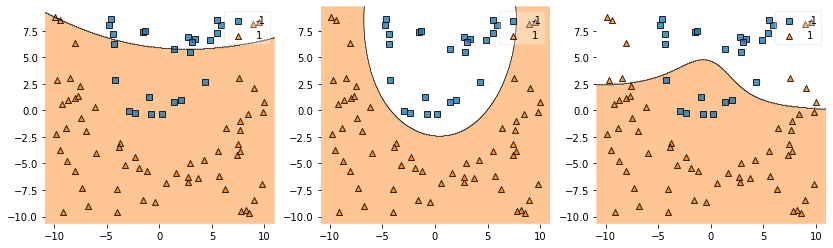

In [55]:
fig, gs = plt.figure(figsize=(14, 4)), gridspec.GridSpec(1, 3)
ax = []
for i in range(3):
    ax.append(fig.add_subplot(gs[i]))

kernels = ['poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    none_linear_model = SVC(kernel=kernels[i])
    none_linear_model.fit(X1, y1)
    plot_decision_regions(X1, np.array(y1, dtype=np.int), none_linear_model, ax=ax[i])

Рассмотрим различные степени полинома:

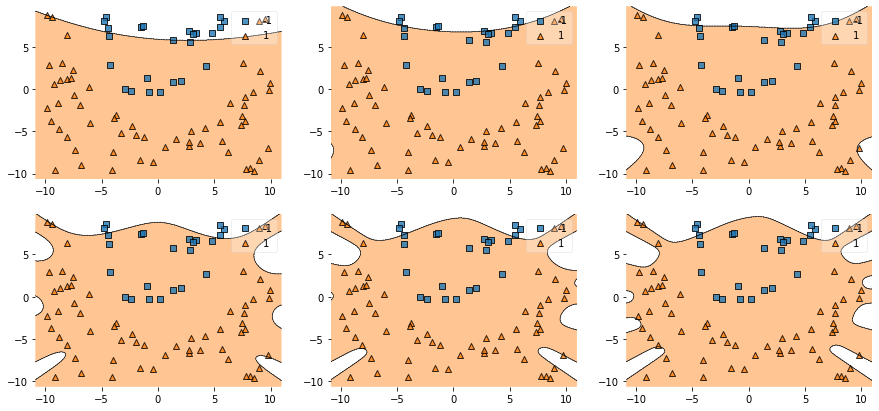

In [70]:
fig, gs = plt.figure(figsize=(15, 7)), gridspec.GridSpec(2, 3)
ax = []
for i in range(6):
    ax.append(fig.add_subplot(gs[i]))

degrees = [3, 5, 7, 15, 25, 33]
for i in range(len(degrees)):
    none_linear_model = SVC(kernel='poly', degree=degrees[i])
    none_linear_model.fit(X1, y1)
    plot_decision_regions(X1, np.array(y1, dtype=np.int), none_linear_model, ax=ax[i])

**Задание 5.** Решите методом опорных векторов задачу `multiclass_classification` и отобразите результат на графике.

In [72]:
multy_data = pd.read_csv(r'data/multiclass_classification.csv')

In [73]:
multy_data.head(3)

,X1,X2,y
0,0.827082,0.657831,3
1,0.050806,0.478433,2
2,0.444427,0.805732,3


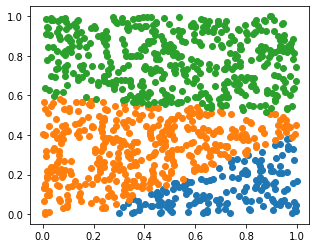

In [77]:
fig, gs = plt.figure(figsize=(5, 4)), gridspec.GridSpec(1, 1)
ax = []
for i in range(1):
    ax.append(fig.add_subplot(gs[i]))
    X, Y = multy_data.values[:, :-1], multy_data.values[:, -1]
    for k in np.unique(Y):
        ax[-1].scatter(X[:, 0][Y==k], X[:, 1][Y==k])
plt.show()

Из данных видно, что здесь подойдет линейное ядро

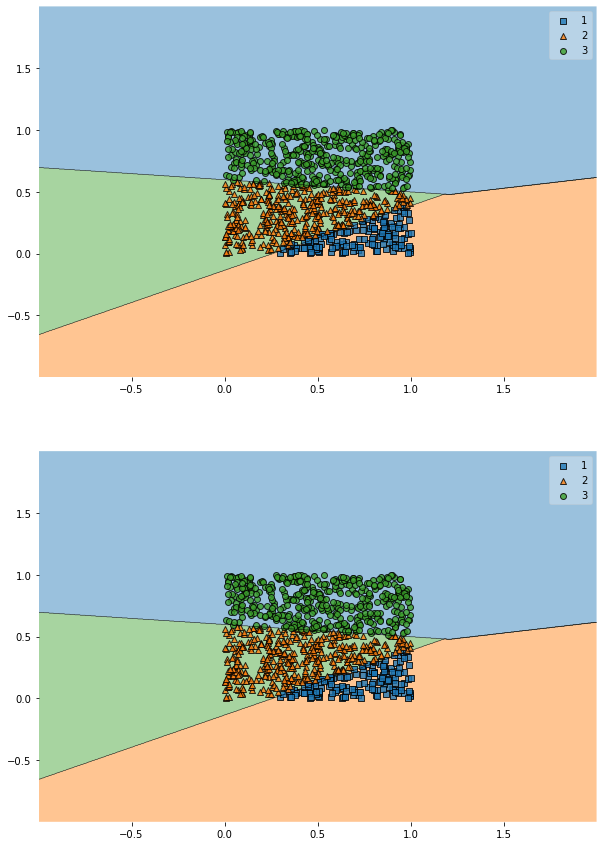

In [99]:
fig, gs = plt.figure(figsize=(10, 15)), gridspec.GridSpec(2, 1)

X, Y = multy_data.values[:, :-1], multy_data.values[:, -1]
models = [SVC(decision_function_shape='ovo', kernel='linear'),
          SVC(decision_function_shape='ovr', kernel='linear')]

ax = []
for i in range(2):
    ax.append(fig.add_subplot(gs[i]))
    model = models[i].fit(X, Y)
    plot_decision_regions(X, np.array(Y, dtype=np.int), model, ax=ax[i])
plt.show()

## Решение задачи классификации текстов

Возьмем в качестве примера данные новостей `fetch_20newsgroups` из sklearn и рассмотрим категории "атеизм" и "космос".

In [84]:
from sklearn.datasets import fetch_20newsgroups

In [85]:
data = fetch_20newsgroups(subset='all', categories=['alt.atheism', 'sci.space'])

Массив с текстами будет находиться в поле `data.data`, номер класса &ndash; в поле `data.target`. В этой задаче для преобразования текстов будем использовать метод Tf-Idf.

In [94]:
len(data.data)

1786

**Задание 1.** Преобразуйте тексты с помощью `TfIdfVectorizer`.

In [90]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [95]:
count_vec = TfidfVectorizer(max_features=30000, sublinear_tf=True, 
                            strip_accents='unicode', analyzer='word', 
                            token_pattern=r'\w{1,}')

In [96]:
data_vec = count_vec.fit_transform(data.data)

In [97]:
data_vec

<1786x28419 sparse matrix of type '<class 'numpy.float64'>'
	with 313811 stored elements in Compressed Sparse Row format>

Реализация SVM находится в классе `sklearn.svm.SVC`. Веса каждого признака у обученного классификатора хранятся в поле `coef_`.

**Задание 2.** С помощью функции `sklearn.model_selection.GridSearchCV` выберите лучший параметр `C` для SVM с линейным ядром (`kernel='linear'`) из множества $[10^{-5}, 10^{-4}, 10^{-3}, ... , 10^{3}, 10^{4}, 10^{5}]$. Кросс-валидацию выполняйте по 5 блокам с параметром `random_state=241` и
для `SVC`, и для `KFold`. Качество оценивайте с помощью метрики `accuracy`.

In [125]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [126]:
kf = KFold(n_splits=5, shuffle=True, random_state=241)
kf.get_n_splits(data_vec)
kf

KFold(n_splits=5, random_state=241, shuffle=True)

In [127]:
model = SVC(kernel='linear', random_state=241)

In [128]:
params = {
    'C': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e1, 1e2, 1e3, 1e4, 1e5]
}

In [129]:
gs = GridSearchCV(model, params, scoring='accuracy')

In [130]:
gs.fit(data_vec, data.target)

GridSearchCV(estimator=SVC(kernel='linear', random_state=241),
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 10.0, 100.0,
                               1000.0, 10000.0, 100000.0]},
             scoring='accuracy')

Результаты:

In [135]:
gs.cv_results_['mean_test_score']

array([0.55263133, 0.55263133, 0.55263133, 0.55263133, 0.95800823,
       0.99048401, 0.99048401, 0.99048401, 0.99048401, 0.99048401])

In [134]:
gs.cv_results_['std_test_score']

array([0.00110708, 0.00110708, 0.00110708, 0.00110708, 0.00661826,
       0.00379042, 0.00379042, 0.00379042, 0.00379042, 0.00379042])

**Задание 3.** Обучите SVM на всей выборке с лучшим параметром `C`. Найдите 10 слов с наибольшим по модулю весом.

Лучший параметр C:

In [138]:
params['C'][5]

10.0

In [139]:
best_model = SVC(kernel='linear', random_state=241, C=params['C'][5])

In [140]:
best_model.fit(data_vec, data.target)

SVC(C=10.0, kernel='linear', random_state=241)

In [176]:
coefs = list(best_model.coef_.toarray()[0])

In [180]:
words = count_vec.get_feature_names()

In [221]:
big_list = zip(coefs, words)
sorted(big_list, key=lambda x: abs(x[0]), reverse=True)[:10]

[(2.6601259164071323, 'space'),
 (-1.999380530806389, 'god'),
 (-1.2853344129311552, 'religion'),
 (-1.2784692191179237, 'atheism'),
 (-1.2632068270225736, 'atheists'),
 (1.1469189404821853, 'sci'),
 (1.1349611112129527, 'moon'),
 (-1.098079241486922, 'religious'),
 (1.0875235081692591, 'nasa'),
 (-1.071397918350914, 'bible')]